<a href="https://colab.research.google.com/github/girishthorat/Generative-Models/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from tensorflow.keras import layers


In [ ]:


mnist=keras.datasets.mnist
def load_data():
  (x_train, y_train),(x_test, y_test)= mnist.load_data()
  x_train = (x_train.astype(np.float32) - 127.5)/127.5
  x_train = x_train.reshape(60000, 784)
  data_slice = 10000
  x_train = x_train[:data_slice,:]
  return (x_train, y_train, x_test, y_test)

(x_train, y_train,x_test, y_test)=load_data()

print(x_train.shape)

(10000, 784)


In [ ]:
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

In [ ]:
def create_generator():
    
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator
g=create_generator()

In [ ]:
g.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 784)               402192    
Total params: 559,632
Trainable params: 559,632
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=784,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
  
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()

In [ ]:
d.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 784)               615440    
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 784)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)               

In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)

In [ ]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


  2%|▏         | 3/128 [00:00<00:06, 20.82it/s]

Epoch 2


  2%|▏         | 3/128 [00:00<00:05, 21.27it/s]

Epoch 3


  2%|▏         | 3/128 [00:00<00:05, 24.09it/s]

Epoch 4


  2%|▏         | 3/128 [00:00<00:05, 23.63it/s]

Epoch 5


  2%|▏         | 2/128 [00:00<00:06, 18.26it/s]

Epoch 6


  2%|▏         | 3/128 [00:00<00:05, 21.11it/s]

Epoch 7


  2%|▏         | 3/128 [00:00<00:05, 21.34it/s]

Epoch 8


  2%|▏         | 3/128 [00:00<00:05, 21.46it/s]

Epoch 9


  2%|▏         | 3/128 [00:00<00:05, 24.33it/s]

Epoch 10


  2%|▏         | 3/128 [00:00<00:05, 22.80it/s]

Epoch 11


  2%|▏         | 3/128 [00:00<00:05, 21.84it/s]

Epoch 12


  2%|▏         | 3/128 [00:00<00:05, 23.22it/s]

Epoch 13


  2%|▏         | 2/128 [00:00<00:06, 18.86it/s]

Epoch 14


  2%|▏         | 3/128 [00:00<00:05, 23.38it/s]

Epoch 15


  2%|▏         | 3/128 [00:00<00:05, 22.01it/s]

Epoch 16


  2%|▏         | 3/128 [00:00<00:05, 23.54it/s]

Epoch 17


  2%|▏         | 2/128 [00:00<00:06, 19.55it/s]

Epoch 18


  2%|▏         | 3/128 [00:00<00:05, 23.93it/s]

Epoch 19


  2%|▏         | 3/128 [00:00<00:05, 22.81it/s]

Epoch 20


  2%|▏         | 3/128 [00:00<00:05, 24.26it/s]

Epoch 21


  2%|▏         | 3/128 [00:00<00:05, 23.34it/s]

Epoch 22


  2%|▏         | 3/128 [00:00<00:05, 21.16it/s]

Epoch 23


  2%|▏         | 3/128 [00:00<00:05, 24.58it/s]

Epoch 24


  2%|▏         | 3/128 [00:00<00:05, 21.24it/s]

Epoch 25


  2%|▏         | 3/128 [00:00<00:05, 23.16it/s]

Epoch 26


  2%|▏         | 3/128 [00:00<00:05, 21.47it/s]

Epoch 27


  2%|▏         | 3/128 [00:00<00:05, 23.12it/s]

Epoch 28


  2%|▏         | 3/128 [00:00<00:05, 22.37it/s]

Epoch 29


  2%|▏         | 3/128 [00:00<00:05, 20.99it/s]

Epoch 30


  2%|▏         | 3/128 [00:00<00:05, 20.98it/s]

Epoch 31


  2%|▏         | 3/128 [00:00<00:05, 21.21it/s]

Epoch 32


  2%|▏         | 3/128 [00:00<00:05, 23.31it/s]

Epoch 33


  2%|▏         | 2/128 [00:00<00:06, 19.67it/s]

Epoch 34


  2%|▏         | 2/128 [00:00<00:06, 19.74it/s]

Epoch 35


  2%|▏         | 2/128 [00:00<00:06, 18.54it/s]

Epoch 36


  2%|▏         | 3/128 [00:00<00:05, 22.41it/s]

Epoch 37


  2%|▏         | 3/128 [00:00<00:05, 21.32it/s]

Epoch 38


  2%|▏         | 3/128 [00:00<00:05, 22.71it/s]

Epoch 39


  2%|▏         | 3/128 [00:00<00:05, 22.22it/s]

Epoch 40


  2%|▏         | 3/128 [00:00<00:05, 21.71it/s]

Epoch 41


  2%|▏         | 3/128 [00:00<00:05, 22.14it/s]

Epoch 42


  2%|▏         | 3/128 [00:00<00:05, 21.84it/s]

Epoch 43


  2%|▏         | 3/128 [00:00<00:05, 22.41it/s]

Epoch 44


  2%|▏         | 3/128 [00:00<00:05, 23.96it/s]

Epoch 45


  2%|▏         | 2/128 [00:00<00:06, 18.46it/s]

Epoch 46


  2%|▏         | 3/128 [00:00<00:05, 22.31it/s]

Epoch 47


  2%|▏         | 3/128 [00:00<00:06, 20.54it/s]

Epoch 48


  2%|▏         | 3/128 [00:00<00:05, 21.61it/s]

Epoch 49


  2%|▏         | 3/128 [00:00<00:05, 21.60it/s]

Epoch 50


100%|██████████| 128/128 [00:05<00:00, 21.75it/s]


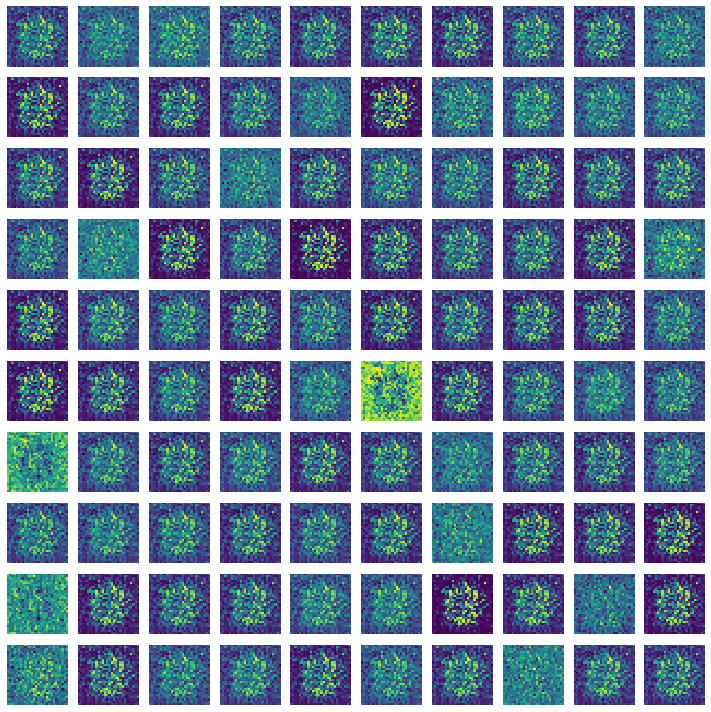

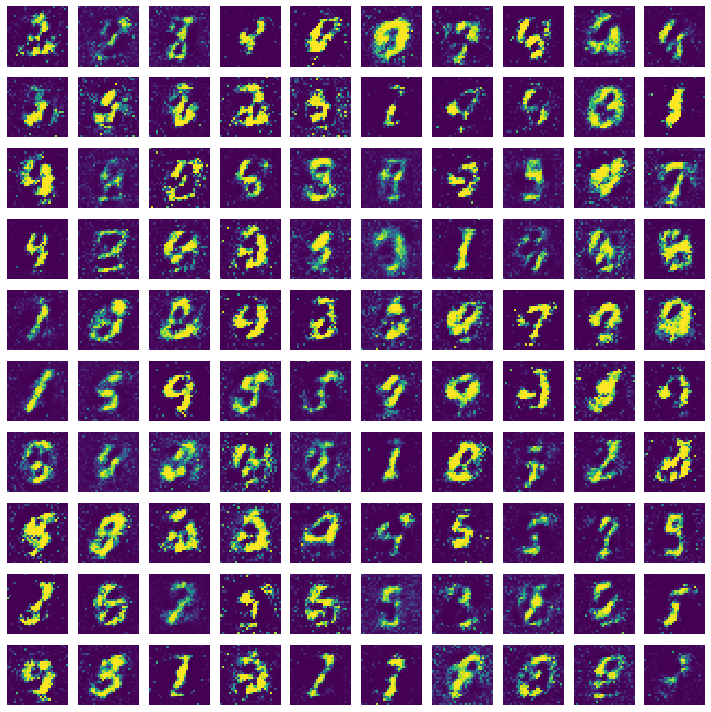

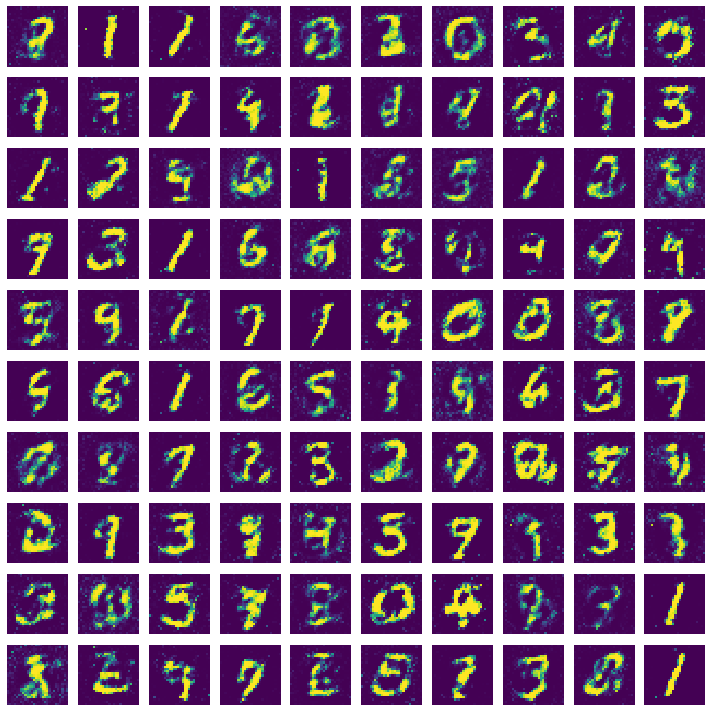

In [ ]:
def training(epochs=1, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(50,128)

(60000,)